# import

In [159]:
# data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
import json
from urllib.parse import quote

# crawling
import requests
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup

# time control
from time import sleep
from datetime import datetime, date, timedelta

# NLP
import re
import ckonlpy
from ckonlpy.tag import Twitter
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import openai

# NLP Visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud
import cv2


# customized functions
from news_utils import *
from news_crawling import *
from news_utils import *
from news_words import *
from news_summarize import *

# utils
from tqdm import tqdm
import os

import warnings # FutureWarning 안보이게
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# 다음 뉴스 크롤링

In [2]:
prepared_urls = get_urls_daum()

df_daum = pd.DataFrame({'URL':prepared_urls, '신문사':np.nan, '기자명':np.nan, '제목':np.nan, '본문':np.nan,
                   '날짜':np.nan, '연':np.nan, '월':np.nan, '일':np.nan, '요일':np.nan})

df_daum = news_crawler_daum(df_daum)
display(df_daum.head(3))
display(df_daum.tail(3))

An exception occurred: Message: 



100%|██████████| 1439/1439 [20:46<00:00,  1.15it/s]


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://v.daum.net/v/20230703235813513,더팩트,최승진,"하이브IM ""별이되어라2, 대만·일본서 FGT 완료""",'별이되어라2: 베다의 기사들' 대표 이미지 /하이브IM\n\n[더팩트 | 최승진 ...,2023-07-03,2023,7,3,0
1,https://v.daum.net/v/20230703233829395,한국경제TV,엄수영,"마이크로칩, 인도에 3억 달러 투자…R&D 센터 확장",[한국경제TV 엄수영 기자]\n마이크로칩은 3일(현지시간) 인도에서의 입지를 확장하...,2023-07-03,2023,7,3,0
2,https://v.daum.net/v/20230703233328372,지디넷코리아,최다래,"카카오페이증권, 일부 서비스 오류...""현재 정상화""",실시간 순위 보기 등 서비스 지연 발생\n(지디넷코리아=최다래 기자)카카오페이증권에...,2023-07-03,2023,7,3,0


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
1436,https://v.daum.net/v/20230704000546718,강원도민일보,천남수,[명경대] 뉴스 알고리즘,국민의힘 박성중 의원은 네이버 뉴스 알고리즘이 보수언론에 불리하게 작용하고 있다는 ...,2023-07-04,2023,7,4,1
1437,https://v.daum.net/v/20230704000324658,중앙일보,입력,"[사진] 45년간 작동되던 국내 첫 벽걸이 에어컨, LG전자 품으로","45년간 작동되던 국내 첫 벽걸이 에어컨, LG전자 품으로\n반세기 가까이 작동되던...",2023-07-04,2023,7,4,1
1438,https://v.daum.net/v/20230704000016551,더팩트,최문정,"""보수 매체 노출 막았다""…네이버, 뉴스 알고리즘 조작 논란에 '발끈'","방통위, 네이버 전기통신사업법 위반 여부 실태조사\n네이버, '특정 매체 밀어주기'...",2023-07-04,2023,7,4,1


# 네이버 뉴스 크롤링

In [3]:
# 네이버 IT뉴스 게시판에서 근 24시간에 해당하는 페이지 범위 설정
pages = page_lists(endpage=20)

# get_urls함수에 게시판 링크를 입력해 각 뉴스의 URL 저장
prepared_urls = get_urls_naver(pages=pages, hidden_window=True, verbose=False)

# 기사를 담을 데이터프레임 생성

df_naver = pd.DataFrame({'URL':prepared_urls, '신문사':np.nan, '기자명':np.nan, '제목':np.nan, '본문':np.nan,
                   '날짜':np.nan, '연':np.nan, '월':np.nan, '일':np.nan, '요일':np.nan})

# 각 네이버 기사에서 필요한 정보 스크래핑하여 데이터프레임에 적재
df_naver = news_crawler_naver(df_naver)
display(df_naver.head(3))
display(df_naver.tail(3))

!!! norm_1 문제 발생 !!!
중복 제거 전 URL 수 : 415
중복 제거 후 URL 수 : 415


100%|██████████| 415/415 [05:52<00:00,  1.18it/s]


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://n.news.naver.com/mnews/article/215/000...,한국경제TV,이근형,"LG U+ AI가 만든 광고 출시…""제작비 4분의1로""",LG유플러스가 AI를 활용해 만든 영상광고를 업계 최초로 론칭했다.\n\nLG유플러...,2023-07-04,2023,7,4,1
1,https://n.news.naver.com/mnews/article/003/001...,뉴시스,송혜리,"NHN, 모비릭스 게임 '무한 영웅'에 클라우드 솔루션 공급","글로벌 RPG게임에 'NHN앱가드' '게임베이스' 제공\n아이템 성능 조작, 게임 ...",2023-07-04,2023,7,4,1
2,https://n.news.naver.com/mnews/article/014/000...,파이낸셜뉴스,구자윤,"이사회 구성 마친 KT, 차기 대표 선임 절차 돌입",새 이사회를 꾸린 KT가 차기 대표이사 선임 절차에 돌입한다고 4일 밝혔다.\n\n...,2023-07-04,2023,7,4,1


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
228,https://n.news.naver.com/mnews/article/016/000...,헤럴드경제,고재우,대장균 ‘득실’한 반숙 계란장 “먹지마세요”,식약처는 농업회사법인조인 맹동지점에서 유통 중인 '비벼먹는 반숙 계란장'에 대해 판...,2023-07-03,2023,7,3,0
229,https://n.news.naver.com/mnews/article/092/000...,ZDNet Korea,이한얼,"K배터리 분리막 수요 연평균 17%↑...""2030년 100억 달러 돌파""","국내 배터리 3사(LG에너지솔루션, SK온, 삼성SDI)의 분리막 수요가 오는 20...",2023-07-03,2023,7,3,0
230,https://n.news.naver.com/mnews/article/366/000...,조선비즈,정보없음,"20대 고객 잡기 나선 KT... 김은상 상무 “Y브랜드, 세대 공감 이끌어내는 마케팅”","“알뜰폰 성장, 어려운 숙제지만 고객 인식만큼 가격차이 안 커”\n\n김은상 KT ...",2023-07-03,2023,7,3,0


# 네이버 뉴스와 다음 뉴스를 Merge 데이터프레임 만들기

In [4]:
df = pd.concat([df_naver, df_daum], axis=0)
df = df.reset_index(drop=True)
df

,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://n.news.naver.com/mnews/article/215/000...,한국경제TV,이근형,"LG U+ AI가 만든 광고 출시…""제작비 4분의1로""",LG유플러스가 AI를 활용해 만든 영상광고를 업계 최초로 론칭했다.\n\nLG유플러...,2023-07-04,2023,7,4,1
1,https://n.news.naver.com/mnews/article/003/001...,뉴시스,송혜리,"NHN, 모비릭스 게임 '무한 영웅'에 클라우드 솔루션 공급","글로벌 RPG게임에 'NHN앱가드' '게임베이스' 제공\n아이템 성능 조작, 게임 ...",2023-07-04,2023,7,4,1
2,https://n.news.naver.com/mnews/article/014/000...,파이낸셜뉴스,구자윤,"이사회 구성 마친 KT, 차기 대표 선임 절차 돌입",새 이사회를 꾸린 KT가 차기 대표이사 선임 절차에 돌입한다고 4일 밝혔다.\n\n...,2023-07-04,2023,7,4,1
3,https://n.news.naver.com/mnews/article/277/000...,아시아경제,오수연,"KT, 휴가철 로밍 혜택 확대…매장 방문하면 할인권 증정",KT는 여름 방학 및 휴가 시즌을 맞아 해외로 떠나는 KT 모바일 고객들을 위한 로...,2023-07-04,2023,7,4,1
4,https://n.news.naver.com/mnews/article/015/000...,한국경제,김정아,"""애플, 생산공정 문제로 비전프로 생산 줄일 계획"" FT","""당초 24년 1백만대 판매 목표에서 40만대로 줄여""\n""장치용 마이크로 OLED...",2023-07-03,2023,7,3,0
...,...,...,...,...,...,...,...,...,...,...
1165,https://v.daum.net/v/20230704030147304,조선일보,변희원,[모닝] 에어팟이 보청기도 된다? 소리 키워주는 기능 개발,애플이 무선 이어폰 에어팟에 청력과 체온을 측정할 수 있는 기능을 추가하면서 보청기...,2023-07-04,2023,7,4,1
1166,https://v.daum.net/v/20230704005028027,연합뉴스,강건택,"WSJ ""AI 500번 외친 손정의, 정작 '챗GPT 열풍'서 소외""",생성형 AI 투자 미흡…타이밍 어긋나고 'AI 활용' 기업 위주로 투자한 탓\n손정...,2023-07-04,2023,7,4,1
1167,https://v.daum.net/v/20230704000546718,강원도민일보,천남수,[명경대] 뉴스 알고리즘,국민의힘 박성중 의원은 네이버 뉴스 알고리즘이 보수언론에 불리하게 작용하고 있다는 ...,2023-07-04,2023,7,4,1
1168,https://v.daum.net/v/20230704000324658,중앙일보,입력,"[사진] 45년간 작동되던 국내 첫 벽걸이 에어컨, LG전자 품으로","45년간 작동되던 국내 첫 벽걸이 에어컨, LG전자 품으로\n반세기 가까이 작동되던...",2023-07-04,2023,7,4,1


# 텍스트 전처리

In [39]:
# raw text와 processed text를 비교하기 위해 copy
df_preprocess = df.copy()
df_preprocess['본문'] = df_preprocess['본문'].str.upper() # 전부 대문자로 변경

# twitter 객체에 Noun 단어 adding
twitter = Twitter()

# 사용자 정의 명사 지정 리스트 받기
add_words = get_addwords()
# 불용어 리스트 받기
stop_words = get_stopwords()

for noun in add_words:
    twitter.add_dictionary(noun, 'Noun')

# re와 ckonlpy로 전처리
articles = df_preprocess['본문']

# 본문 Seriese객체에서 index 받아오기
# 기사의 건수(약 1400건)만큼 iter
for idx in tqdm(range(len(articles))): 
    # re로 기본적인 전처리
    text = articles[idx]
    to_remove = '[\n,@\'()‘“”’%./■△\"·]+'
    text = re.sub(to_remove, '', text)
    
    # ckonlpy로 ' '로 구분된 string형태의 corpus 생성
    contents =''
    for temp_word in twitter.nouns(text):
        # 한글자와 불용어 제외
        if (len(temp_word) > 1)&(temp_word not in stop_words):
            contents = contents + ' ' + temp_word
    
    # 전처리를 거친 corpus를 df_preprocess의 본문에 저장
    df_preprocess.loc[idx, '본문'] = contents.strip()

# 중복 제거
df_preprocess = df_preprocess.drop_duplicates(subset=['본문'])
    
######################################## Check result
sleep(2)
print("전처리 전 :")
print("*"*50)
display(df.head(3))
display(df.tail(3))
print('\n\n')
print("전처리 후 :")
print("*"*50)
display(df_preprocess.head(3))
display(df_preprocess.tail(3))
########################################

C:\Users\kyooo\anaconda3\envs\final\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
100%|██████████| 1170/1170 [00:27<00:00, 43.22it/s]


전처리 전 :
**************************************************


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://n.news.naver.com/mnews/article/215/000...,한국경제TV,이근형,"LG U+ AI가 만든 광고 출시…""제작비 4분의1로""",LG유플러스가 AI를 활용해 만든 영상광고를 업계 최초로 론칭했다.\n\nLG유플러...,2023-07-04,2023,7,4,1
1,https://n.news.naver.com/mnews/article/003/001...,뉴시스,송혜리,"NHN, 모비릭스 게임 '무한 영웅'에 클라우드 솔루션 공급","글로벌 RPG게임에 'NHN앱가드' '게임베이스' 제공\n아이템 성능 조작, 게임 ...",2023-07-04,2023,7,4,1
2,https://n.news.naver.com/mnews/article/014/000...,파이낸셜뉴스,구자윤,"이사회 구성 마친 KT, 차기 대표 선임 절차 돌입",새 이사회를 꾸린 KT가 차기 대표이사 선임 절차에 돌입한다고 4일 밝혔다.\n\n...,2023-07-04,2023,7,4,1


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
1167,https://v.daum.net/v/20230704000546718,강원도민일보,천남수,[명경대] 뉴스 알고리즘,국민의힘 박성중 의원은 네이버 뉴스 알고리즘이 보수언론에 불리하게 작용하고 있다는 ...,2023-07-04,2023,7,4,1
1168,https://v.daum.net/v/20230704000324658,중앙일보,입력,"[사진] 45년간 작동되던 국내 첫 벽걸이 에어컨, LG전자 품으로","45년간 작동되던 국내 첫 벽걸이 에어컨, LG전자 품으로\n반세기 가까이 작동되던...",2023-07-04,2023,7,4,1
1169,https://v.daum.net/v/20230704000016551,더팩트,최문정,"""보수 매체 노출 막았다""…네이버, 뉴스 알고리즘 조작 논란에 '발끈'","방통위, 네이버 전기통신사업법 위반 여부 실태조사\n네이버, '특정 매체 밀어주기'...",2023-07-04,2023,7,4,1





전처리 후 :
**************************************************


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
0,https://n.news.naver.com/mnews/article/215/000...,한국경제TV,이근형,"LG U+ AI가 만든 광고 출시…""제작비 4분의1로""",LG 유플러스 AI 활용 영상 광고 업계 최초 론칭했다 LG 유플러스 유스 청년 요...,2023-07-04,2023,7,4,1
1,https://n.news.naver.com/mnews/article/003/001...,뉴시스,송혜리,"NHN, 모비릭스 게임 '무한 영웅'에 클라우드 솔루션 공급",글로벌 RPG 게임 가드 게임 베이스 아이템 성능 조작 게임 플레이 조작 차단 클라...,2023-07-04,2023,7,4,1
2,https://n.news.naver.com/mnews/article/014/000...,파이낸셜뉴스,구자윤,"이사회 구성 마친 KT, 차기 대표 선임 절차 돌입",이사회 KT 차기 대표이사 선임 절차 돌입 KT 지난달 임시 주주총회 신규 사외이사...,2023-07-04,2023,7,4,1


,URL,신문사,기자명,제목,본문,날짜,연,월,일,요일
1167,https://v.daum.net/v/20230704000546718,강원도민일보,천남수,[명경대] 뉴스 알고리즘,국민 박성 의원 네이버 뉴스 알고리즘 보수 언론 리하 작용 의혹 제기 네이버 알고리...,2023-07-04,2023,7,4,1
1168,https://v.daum.net/v/20230704000324658,중앙일보,입력,"[사진] 45년간 작동되던 국내 첫 벽걸이 에어컨, LG전자 품으로",작동 국내 걸이 에어컨 LG전자 반세기 가까이 작동 국내 최초 걸이 에어컨 LG전자...,2023-07-04,2023,7,4,1
1169,https://v.daum.net/v/20230704000016551,더팩트,최문정,"""보수 매체 노출 막았다""…네이버, 뉴스 알고리즘 조작 논란에 '발끈'",방통위 네이버 전기통신사업법 위반 여부 태조 사네이 특정 매체 주기 사실 무근 알고...,2023-07-04,2023,7,4,1


In [40]:
articles = df_preprocess['본문'].tolist()
articles[0]

'LG 유플러스 AI 활용 영상 광고 업계 최초 론칭했다 LG 유플러스 유스 청년 요금 출시 기념 시나리오 부터 이미지 영상 음성 다양 AI 활용 광고 제작 출시 유스 청년 요금 고객 대상 데이터 요금 제로 고객 정보검색 유튜브 릴스 동영상 시청 익숙 AI 경험 부감 착안 광고 기획 LG 유플러스 측은 설명 광고 배우 주현영 LG 유플러스 퇴근 마케터 AI 광고 제작 스토리 진행 LG 유플러스 자체 AI 전담 조직 보유 활용 시나리오 이미지 음성 영상 광고 제작 필요 소스 소개 다양 아이디어 성형 AI 광고 텍스트 시나리오 제작 장면 이미지 영상 시각 AI 편집 광고 제작 AI 출력 여개 소스 사용 음성 AI 활용 적절 성우 내레이션 삽입 차례 검수 과정 LG 유플러스 광고 과정 성형 AI 덕분 제작비 통상 광고 제작 어가 비용 대비 제작 기간 크게 분석 장준영 LG 유플러스 담당 상무 시나리오 이미지 음성 영상 AI 산출 통신업 최초 광고 제작 AI 마케팅 영역 확장 사례 주목 성형 AI 캠페인 고객 경험 혁신 활동 소개 활용'

# 토픽 모델링 및 Topic Num 최적화

In [41]:
# 리스트 내 리스트 형태로 저장
preprocessed_articles = [article.split(' ') for article in articles]

In [42]:
# corpora.Dictionary
dictionary = corpora.Dictionary(preprocessed_articles)
dictionary.filter_extremes(no_below=10, no_above=0.8)

corpus = [dictionary.doc2bow(article) for article in preprocessed_articles]
texts = [preprocessed_articles[idx] for idx in range(len(corpus))]

In [43]:
PARAM = {
    'RANGES':15,
    'PASSES':100,
    'ITER':100,
    'COHERENCE_METRIC':'c_v',
}

In [44]:
# 3개부터 최대 15개까지의 토픽 수를 비교하며 정합도 점수 기록
news_coherence_scores = []

for i in tqdm(range(3, PARAM['RANGES']+1), desc="Operating All Topic Ranges"):
    model = LdaModel(corpus=corpus, num_topics=i, id2word=dictionary, passes=PARAM['PASSES'],
                     iterations=PARAM['ITER'])
    coherence_model = CoherenceModel(model=model, texts=texts, corpus=corpus, dictionary=dictionary, coherence=PARAM['COHERENCE_METRIC'])
    coherence_lda = coherence_model.get_coherence()
    news_coherence_scores.append(coherence_lda)

Operating All Topic Ranges: 100%|██████████| 13/13 [28:05<00:00, 129.63s/it]


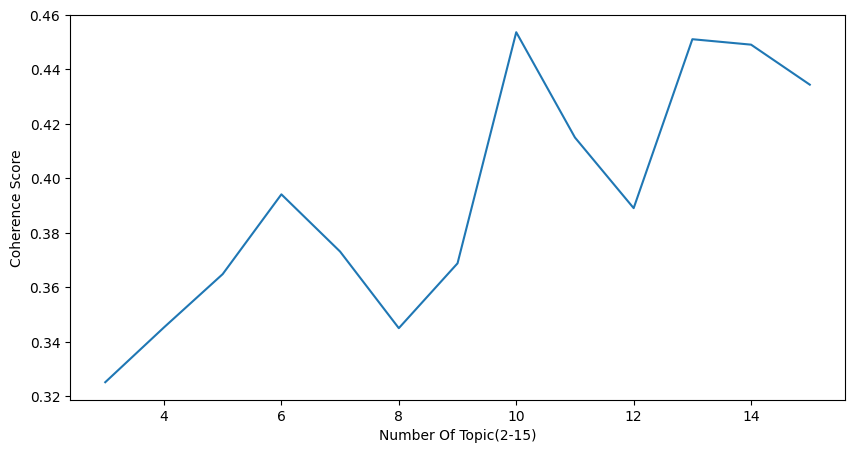

In [45]:
k = [i for i in range(3, PARAM['RANGES']+1)]
x = np.array(k)
y = np.array(news_coherence_scores)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel("Number Of Topic(2-"+str(PARAM['RANGES'])+")")
plt.ylabel('Coherence Score')
plt.show()

# Topic Num이 최적화된 모델

In [46]:
find_best = np.array([news_coherence_scores])
Best_Num_Of_Topic = int(np.where(y==find_best.max())[0][0]+3)
print("최적의 토픽 수 :", Best_Num_Of_Topic)
print("정합도 점수 :", round(find_best.max(), 4))

최적의 토픽 수 : 10
정합도 점수 : 0.4537


In [47]:
num_topics = Best_Num_Of_Topic
lda_model = LdaModel(corpus, num_topics, dictionary, passes=PARAM['PASSES'], iterations=PARAM['ITER'])#, alpha=PARAM['ALPHA'], eta=PARAM['ETA'])

In [48]:
# LDA 시각화
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary)
pyLDAvis.display(p)

# 각 토픽에 정합하는 기사 추출

In [209]:
# 각 문서에 대한 주제 분포 가져오기
document_topics = [lda_model.get_document_topics(doc) for doc in corpus]
# document_topics # 1382개

main_topic_list = []

for article_idx, article in enumerate(document_topics):
    max_score = 1e-8
    max_topic_num = -1e-8
    
    # 한 기사안에서 토픽 : 점수
    for topicnum, score in article:
        if score > max_score:
            max_score = score
            max_topic_num = topicnum
    #main_topic_list.append((str(max_topic_num+1)+'번토픽', max_score))
    main_topic_list.append((int(max_topic_num)+1, max_score))

main_topic_list

[(9, 0.99422985),
 (7, 0.5350826),
 (3, 0.99476695),
 (6, 0.96908516),
 (6, 0.99291056),
 (1, 0.95282066),
 (5, 0.9908152),
 (5, 0.99552083),
 (8, 0.37528032),
 (2, 0.39698696),
 (10, 0.5958039),
 (8, 0.8490589),
 (4, 0.73269594),
 (3, 0.9970963),
 (1, 0.8116395),
 (7, 0.37261358),
 (8, 0.98888737),
 (7, 0.8621647),
 (2, 0.28771365),
 (5, 0.6603113),
 (4, 0.5009861),
 (6, 0.392203),
 (2, 0.34208542),
 (8, 0.9905753),
 (10, 0.91304547),
 (6, 0.64256364),
 (10, 0.43913215),
 (1, 0.5796141),
 (8, 0.61049664),
 (7, 0.52105755),
 (10, 0.3600584),
 (4, 0.80209565),
 (1, 0.7699113),
 (8, 0.3724074),
 (7, 0.6874568),
 (2, 0.7304789),
 (1, 0.8220025),
 (6, 0.5365068),
 (2, 0.5042325),
 (7, 0.7402856),
 (1, 0.99645525),
 (1, 0.9984288),
 (1, 0.99611986),
 (3, 0.9958711),
 (6, 0.98237866),
 (8, 0.991815),
 (7, 0.57220495),
 (1, 0.9968074),
 (8, 0.99454445),
 (8, 0.99513435),
 (2, 0.27736825),
 (7, 0.56905836),
 (9, 0.6220314),
 (7, 0.9901053),
 (3, 0.9961854),
 (7, 0.9843506),
 (1, 0.7316168),
 (

In [210]:
# 토픽과 점수 추가하여 df_merged로 합치기
df_score = pd.DataFrame(main_topic_list, columns=['토픽', '점수'])
df_merged = pd.concat([df_preprocess, df_score], axis=1)

In [211]:
# 높은 점수 순서대로 정렬한 후, 토픽으로 group을 생성한 후, 상위 5개씩 추출
df_merged = df_merged.drop_duplicates(subset=['제목'])
df_merged = df_merged.sort_values('점수', ascending=False)
df_result = df_merged.groupby('토픽').head(5)
df_result = df_result.sort_values('토픽', ignore_index=True)
df_result['토픽'] = df_result['토픽'].astype(int)
df_result = df_result[['URL', '토픽', '점수', '제목', '본문']]
# 최대 행 제한 해제
pd.set_option('display.max_rows', None)
# 최대 열 제한 해제
pd.set_option('display.max_columns', None)

df_result

,URL,토픽,점수,제목,본문
0,https://n.news.naver.com/mnews/article/092/000...,1,0.998429,[리뷰] 주름 줄었다는데...中 폴더블폰 실제로 보니,화웨이 메이트 오포 파인드 플립 삼성 갤럭시 실물 비교 상하이 중국 이나리 삼성전자...
1,https://n.news.naver.com/mnews/article/008/000...,1,0.997222,"조성경 신임 과기차관 ""R&D 예산 핵심, 과학자·인재 육성""",정부 초대 기비 서관 출신 차관 취임 과기정통부 역할 어조 당부 당장 개발 관행 적...
2,https://v.daum.net/v/20230703150809455,1,0.997272,"로앤굿 ""변협의 '법률 플랫폼 척결' 그만…변호사 징계 철회해야""",로앤굿 누구 변호사 선임 세상 변화 수용 서울 본사 로앤굿 입장 표명 기자회견 민영...
3,https://v.daum.net/v/20230703151522801,1,0.997019,"SKT, ICT로 만드는 안전 산업현장…'국제안전보건전시회' 참가",킨텍스 국제 안전 보건 전시회 여해 SK 쉴더스 AI 지능 안전 전시 고양시 킨텍스...
4,https://v.daum.net/v/20230703153202518,1,0.998360,"넥슨-삼성전자, ‘삼성 강남’ 내 ‘메이플스토리 월드’ 활용 교육 개시",넥슨 삼성전자 창작 놀이 플랫폼 메이플스토리 월드 활용 교육 프로그램 삼성 강남 플...
5,https://v.daum.net/v/20230704091740318,2,0.997187,"영림원, 스마트팩토리 전문기업 코닉오토메이션에 ERP 공급",개별 특화된 시스템 에이스 비즈니스 모델 다양성 적극 대응 서울 뉴시스 혜리 영림 ...
6,https://v.daum.net/v/20230704114926790,2,0.996068,"KT, 전국대표번호 신규 국번 ‘1551’ 추가",KT 전국 번호 신규 국번 번호 추가 국번 번부 번호 사용 소개 가운데 선호 골드 ...
7,https://v.daum.net/v/20230704094749445,2,0.995963,"KT, 휴가철 로밍 혜택 강화",KT 파이낸셜뉴스 KT 여름 방학 휴가 해외 KT 모바일 이용자 로밍 이벤트 진행 ...
8,https://v.daum.net/v/20230704112515612,2,0.995889,"KT, 신임 대표이사 후보자 12일까지 모집…'공모+주주 추천'",서울 KT 광화문 사옥 관계자 출입 연합뉴스 KT 신임 대표이사 선임 절차 KT 차...
9,https://v.daum.net/v/20230704100902375,2,0.996750,"‘엑스플라’, ’일드길드게임즈’와 파트너십 강화",업무 협약 컴투스홀딩스 글로벌 블록체인 메인 엑스 일드 길드 게임 파트너 강화 업무...


# 확인한 결과에서, 메일에 사용할 기사만 추출

In [212]:
select_topic = input('사용할 토픽을 입력하세요')
select_topic = select_topic.split(' ')

naming = input('순서대로 토픽의 키워드를 명명하세요.')
naming = naming.split(' ')

cond1 = (df_result['토픽']==int(select_topic[0]))
cond2 = (df_result['토픽']==int(select_topic[1]))
cond3 = (df_result['토픽']==int(select_topic[2]))

df_result = df_result[cond1|cond2|cond3]

topic_num, topic_keywords = [int(select_topic[0]), int(select_topic[1]), int(select_topic[2])], [naming[0], naming[1], naming[2]]
df_result.loc[df_result['토픽'].isin(topic_num), '토픽'] = df_result['토픽'].map(dict(zip(topic_num, topic_keywords)))
df_result

사용할 토픽을 입력하세요1 8 10
순서대로 토픽의 키워드를 명명하세요.IT사이언스 바이오 네이버


,URL,토픽,점수,제목,본문
0,https://n.news.naver.com/mnews/article/092/000...,IT사이언스,0.998429,[리뷰] 주름 줄었다는데...中 폴더블폰 실제로 보니,화웨이 메이트 오포 파인드 플립 삼성 갤럭시 실물 비교 상하이 중국 이나리 삼성전자...
1,https://n.news.naver.com/mnews/article/008/000...,IT사이언스,0.997222,"조성경 신임 과기차관 ""R&D 예산 핵심, 과학자·인재 육성""",정부 초대 기비 서관 출신 차관 취임 과기정통부 역할 어조 당부 당장 개발 관행 적...
2,https://v.daum.net/v/20230703150809455,IT사이언스,0.997272,"로앤굿 ""변협의 '법률 플랫폼 척결' 그만…변호사 징계 철회해야""",로앤굿 누구 변호사 선임 세상 변화 수용 서울 본사 로앤굿 입장 표명 기자회견 민영...
3,https://v.daum.net/v/20230703151522801,IT사이언스,0.997019,"SKT, ICT로 만드는 안전 산업현장…'국제안전보건전시회' 참가",킨텍스 국제 안전 보건 전시회 여해 SK 쉴더스 AI 지능 안전 전시 고양시 킨텍스...
4,https://v.daum.net/v/20230703153202518,IT사이언스,0.998360,"넥슨-삼성전자, ‘삼성 강남’ 내 ‘메이플스토리 월드’ 활용 교육 개시",넥슨 삼성전자 창작 놀이 플랫폼 메이플스토리 월드 활용 교육 프로그램 삼성 강남 플...
35,https://v.daum.net/v/20230704121201634,바이오,0.996169,[콘텐츠 핫&뉴] ‘어비스리움’ 기념 테마 ‘가면무도회’ 선,어비스 리움 주년 기념 테마 가면무도회 위메이드 커넥트 이호 모바일 게임 어비스 리...
36,https://v.daum.net/v/20230704093340876,바이오,0.996234,출연연 주요 예산 20% 삭감안 제출···R&D 구조조정되나,규모 전략 분배 내년 국가 예산안 검토 지시 서울 경제 윤석열 대통령 내년 국가 연...
37,https://v.daum.net/v/20230704095547743,바이오,0.996265,"유바이오로직스, ‘유코백-19’ 필리핀 품목허가 신청",바이오 로직 코로나 백신 유코 바이오 로직 헤럴드경제 바이오 로직 코로나 백신 유코...
38,https://n.news.naver.com/mnews/article/008/000...,바이오,0.996469,[우보세] 아리송한 '공공SW사업 대기업 참여' 허용기준,편집자 뉴스 현장 희로애락 가운데 기사 쓰기 생각 일도 우리 세상 우보 머니투데이 ...
39,https://n.news.naver.com/mnews/article/366/000...,바이오,0.996120,원형탈모 유발하는 범인 찾았다…치료제 개발 가능성 높여,AI 중앙대 병원 공동 연구 진국 구진 원형탈모 발병 이유 치료 전략 제시 왼쪽 부...


# 메일링 형식으로 데이터프레임 가공 (+ 기사요약)

In [213]:
def temp_summarize_text(text):
    url = 'https://naveropenapi.apigw.ntruss.com/text-summary/v1/summarize'
    client_id = '7ie1n9fatv'
    client_secret = 'ALFMzAMwzrzHuVUr1kA7gT3NdcffWgu0Dq2L2H1o'

    # 텍스트를 2000 단어로 제한
    text = text[:2000]

    if '사진' in text:
        request_body = {
        "document": {
            "content": text
        },
        "option": {
            "language": 'ko',
            "model": "news",
            "summaryCount": 2,
            "tone": 0
        }
    }
    else:
        request_body = {
        "document": {
            "content": text
        },
        "option": {
            "language": 'ko',
            "model": "general",
            "summaryCount": 2,
            "tone": 0
        }
    }

    headers = {
        'Accept': 'application/json;UTF-8',
        'Content-Type': 'application/json;UTF-8',
        'X-NCP-APIGW-API-KEY-ID': client_id,
        'X-NCP-APIGW-API-KEY': client_secret
    }

    response = requests.post(url, headers=headers, data=json.dumps(request_body).encode('UTF-8'))
    
    rescode = response.status_code
    if rescode == 200:
        summary = response.text
    else:
        print("Error : " + response.text)
        summary = ""
    article = re.sub(r'\\|\'|\n|n|\"', '', summary).split(':')[1].rstrip('}')
    return article

In [214]:
# Inner Join으로 본문 컬럼 다시 가져와 추가
df_final = pd.merge(df_result, df[['URL', '본문']], on='URL', how='inner')

# 컬럼명 재설정
df_final = df_final.rename(columns={'본문_x':'본문', '본문_y':'원본', 'URL':'link', '제목':'title', '토픽':'topic'})
df_final = df_final.rename(columns={'본문':'wc'})

# 빈 요약 컬럼 추가
df_final['desc'] = np.nan

# 가독성을 위해 순서 변경
df_final = df_final[['topic', 'link', 'wc', 'desc', '원본', 'title']]

# 네이버 클로바를 이용한 요약 추가
df_final['desc'] = df_final['원본'].apply(temp_summarize_text)

# 본문 요약에 사용한 원본 컬럼 삭제
df_final = df_final.drop(columns=['원본'])

df_final

,topic,link,wc,desc,title
0,IT사이언스,https://n.news.naver.com/mnews/article/092/000...,화웨이 메이트 오포 파인드 플립 삼성 갤럭시 실물 비교 상하이 중국 이나리 삼성전자...,"화웨이 메이트X3, 오포 파인드N2·플립...삼성 갤럭시Z4 실물 비교화웨이 메이트...",[리뷰] 주름 줄었다는데...中 폴더블폰 실제로 보니
1,IT사이언스,https://n.news.naver.com/mnews/article/008/000...,정부 초대 기비 서관 출신 차관 취임 과기정통부 역할 어조 당부 당장 개발 관행 적...,"尹정부 초대 과기비서관 출신, 조 차관 취임사에 과기정통부 역할 강한 어조로 당부조...","조성경 신임 과기차관 ""R&D 예산 핵심, 과학자·인재 육성"""
2,IT사이언스,https://v.daum.net/v/20230703150809455,로앤굿 누구 변호사 선임 세상 변화 수용 서울 본사 로앤굿 입장 표명 기자회견 민영...,3일 민영기 로앤굿 대표는 기자회견을 열고 변협 측은 민간 플랫폼 가입 변호사 징계...,"로앤굿 ""변협의 '법률 플랫폼 척결' 그만…변호사 징계 철회해야"""
3,IT사이언스,https://v.daum.net/v/20230703151522801,킨텍스 국제 안전 보건 전시회 여해 SK 쉴더스 AI 지능 안전 전시 고양시 킨텍스...,킨텍스에서 열리는 2023 국제안전보건전시회 참여해종합 경제정보 미디어 이데일리 -...,"SKT, ICT로 만드는 안전 산업현장…'국제안전보건전시회' 참가"
4,IT사이언스,https://v.daum.net/v/20230703153202518,넥슨 삼성전자 창작 놀이 플랫폼 메이플스토리 월드 활용 교육 프로그램 삼성 강남 플...,넥슨은 삼성전자와 함께 창작 놀이 플랫폼 메이플스토리 월드를 활용한 교육 프로그램을...,"넥슨-삼성전자, ‘삼성 강남’ 내 ‘메이플스토리 월드’ 활용 교육 개시"
5,바이오,https://v.daum.net/v/20230704121201634,어비스 리움 주년 기념 테마 가면무도회 위메이드 커넥트 이호 모바일 게임 어비스 리...,"컴프야 2023, 올스타전 기념 이벤트 진행컴투스(대표 이주환)는 야구 게임 컴투스...",[콘텐츠 핫&뉴] ‘어비스리움’ 기념 테마 ‘가면무도회’ 선
6,바이오,https://v.daum.net/v/20230704093340876,규모 전략 분배 내년 국가 예산안 검토 지시 서울 경제 윤석열 대통령 내년 국가 연...,윤석열 대통령이 내년도 국가 연구개발(R&D) 사업 예산안의 재검토를 지시한 가운데...,출연연 주요 예산 20% 삭감안 제출···R&D 구조조정되나
7,바이오,https://v.daum.net/v/20230704095547743,바이오 로직 코로나 백신 유코 바이오 로직 헤럴드경제 바이오 로직 코로나 백신 유코...,유바이오는 3일 공시를 통해 지난 6월 29일 필리핀 식품의약품청(FDA)에 유코백...,"유바이오로직스, ‘유코백-19’ 필리핀 품목허가 신청"
8,바이오,https://n.news.naver.com/mnews/article/008/000...,편집자 뉴스 현장 희로애락 가운데 기사 쓰기 생각 일도 우리 세상 우보 머니투데이 ...,다만 대기업 참여를 허용하는 기준이 1000억원 이상으로 책정된 이유가 무엇인지 전...,[우보세] 아리송한 '공공SW사업 대기업 참여' 허용기준
9,바이오,https://n.news.naver.com/mnews/article/366/000...,AI 중앙대 병원 공동 연구 진국 구진 원형탈모 발병 이유 치료 전략 제시 왼쪽 부...,그 결과 면역세포 중 하나인 가상기억 T세포에서 유래한 면역세포군이 원형탈모를 일으...,원형탈모 유발하는 범인 찾았다…치료제 개발 가능성 높여


# 워드클라우드 생성 및 wordclouds 폴더에 저장

In [215]:
# 설정
width = 580
height = 338
max_words=30
mask = cv2.imread('./image/circle.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# 시간 포맷
now = datetime.now()
formatted_time = now.strftime("%Y-%m-%d_%p")
formatted_time = formatted_time.lower()

# 각 토픽마다 WC 생성 후 저장
for name in naming:
    text = ' '.join(df_final[df_final['topic']==name]['wc'])
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=width, height=height, max_words=max_words,
                          background_color='white', collocations=False, prefer_horizontal=1, mask=mask).generate(text)
    image = wordcloud.to_image()
    image.save('./wordclouds/'+formatted_time+'_'+name+'.jpg')

# git push 후, 데이터 프레임에 추가

In [216]:
!git status
!git add *
!git commit -m 'upload wordclouds'
!git push

On branch news
Your branch is up to date with 'origin/news'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   "wordclouds/2023-07-04_pm_IT\354\202\254\354\235\264\354\226\270\354\212\244.jpg"
	modified:   "wordclouds/2023-07-04_pm_\353\204\244\354\235\264\353\262\204.jpg"
	modified:   "wordclouds/2023-07-04_pm_\353\260\224\354\235\264\354\230\244.jpg"
	modified:   "\354\265\234\354\242\205\355\225\251\353\263\270.ipynb"

no changes added to commit (use "git add" and/or "git commit -a")


error: pathspec 'wordclouds'' did not match any file(s) known to git
Everything up-to-date


In [217]:
# 깃허브에서 다시 받아오기
wc1 = 'https://github.com/jinn0135/DA28_final_PagePalette/blob/news/news/wordclouds/' + formatted_time+'_'+quote(naming[0])+ '.jpg?raw=true'
wc2 = 'https://github.com/jinn0135/DA28_final_PagePalette/blob/news/news/wordclouds/' + formatted_time+'_'+quote(naming[1])+ '.jpg?raw=true'
wc3 = 'https://github.com/jinn0135/DA28_final_PagePalette/blob/news/news/wordclouds/' + formatted_time+'_'+quote(naming[2])+ '.jpg?raw=true'
temp1 = df_final[df_final['topic']==naming[0]]
temp1['wc'] = wc1

temp2 = df_final[df_final['topic']==naming[1]]
temp2['wc'] = wc2

temp3 = df_final[df_final['topic']==naming[2]]
temp3['wc'] = wc3

C:\Users\kyooo\AppData\Local\Temp\ipykernel_14912\100062875.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['wc'] = wc1
C:\Users\kyooo\AppData\Local\Temp\ipykernel_14912\100062875.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['wc'] = wc2
C:\Users\kyooo\AppData\Local\Temp\ipykernel_14912\100062875.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [218]:
df_prepared = pd.concat([temp1, temp2, temp3])
df_prepared

,topic,link,wc,desc,title
0,IT사이언스,https://n.news.naver.com/mnews/article/092/000...,https://github.com/jinn0135/DA28_final_PagePal...,"화웨이 메이트X3, 오포 파인드N2·플립...삼성 갤럭시Z4 실물 비교화웨이 메이트...",[리뷰] 주름 줄었다는데...中 폴더블폰 실제로 보니
1,IT사이언스,https://n.news.naver.com/mnews/article/008/000...,https://github.com/jinn0135/DA28_final_PagePal...,"尹정부 초대 과기비서관 출신, 조 차관 취임사에 과기정통부 역할 강한 어조로 당부조...","조성경 신임 과기차관 ""R&D 예산 핵심, 과학자·인재 육성"""
2,IT사이언스,https://v.daum.net/v/20230703150809455,https://github.com/jinn0135/DA28_final_PagePal...,3일 민영기 로앤굿 대표는 기자회견을 열고 변협 측은 민간 플랫폼 가입 변호사 징계...,"로앤굿 ""변협의 '법률 플랫폼 척결' 그만…변호사 징계 철회해야"""
3,IT사이언스,https://v.daum.net/v/20230703151522801,https://github.com/jinn0135/DA28_final_PagePal...,킨텍스에서 열리는 2023 국제안전보건전시회 참여해종합 경제정보 미디어 이데일리 -...,"SKT, ICT로 만드는 안전 산업현장…'국제안전보건전시회' 참가"
4,IT사이언스,https://v.daum.net/v/20230703153202518,https://github.com/jinn0135/DA28_final_PagePal...,넥슨은 삼성전자와 함께 창작 놀이 플랫폼 메이플스토리 월드를 활용한 교육 프로그램을...,"넥슨-삼성전자, ‘삼성 강남’ 내 ‘메이플스토리 월드’ 활용 교육 개시"
5,바이오,https://v.daum.net/v/20230704121201634,https://github.com/jinn0135/DA28_final_PagePal...,"컴프야 2023, 올스타전 기념 이벤트 진행컴투스(대표 이주환)는 야구 게임 컴투스...",[콘텐츠 핫&뉴] ‘어비스리움’ 기념 테마 ‘가면무도회’ 선
6,바이오,https://v.daum.net/v/20230704093340876,https://github.com/jinn0135/DA28_final_PagePal...,윤석열 대통령이 내년도 국가 연구개발(R&D) 사업 예산안의 재검토를 지시한 가운데...,출연연 주요 예산 20% 삭감안 제출···R&D 구조조정되나
7,바이오,https://v.daum.net/v/20230704095547743,https://github.com/jinn0135/DA28_final_PagePal...,유바이오는 3일 공시를 통해 지난 6월 29일 필리핀 식품의약품청(FDA)에 유코백...,"유바이오로직스, ‘유코백-19’ 필리핀 품목허가 신청"
8,바이오,https://n.news.naver.com/mnews/article/008/000...,https://github.com/jinn0135/DA28_final_PagePal...,다만 대기업 참여를 허용하는 기준이 1000억원 이상으로 책정된 이유가 무엇인지 전...,[우보세] 아리송한 '공공SW사업 대기업 참여' 허용기준
9,바이오,https://n.news.naver.com/mnews/article/366/000...,https://github.com/jinn0135/DA28_final_PagePal...,그 결과 면역세포 중 하나인 가상기억 T세포에서 유래한 면역세포군이 원형탈모를 일으...,원형탈모 유발하는 범인 찾았다…치료제 개발 가능성 높여


In [222]:
df_prepared.to_csv('./data/' + formatted_time + '.csv', index=False)